In [11]:
import pandas as pd

red_url = '/home/addinedu/dev_ws/data/machine/winequality-red.csv'

white_url = '/home/addinedu/dev_ws/data/machine/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
# wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X= wine.drop(['color'], axis=1)
y = wine['color']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]
pipe = Pipeline(estimators)

In [13]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [14]:
pipe[0]

StandardScaler()

In [15]:
pipe['scaler']

StandardScaler()

In [16]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13, stratify=y)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [18]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))


Train Acc:  0.9657494708485664
Test Acc:  0.9576923076923077


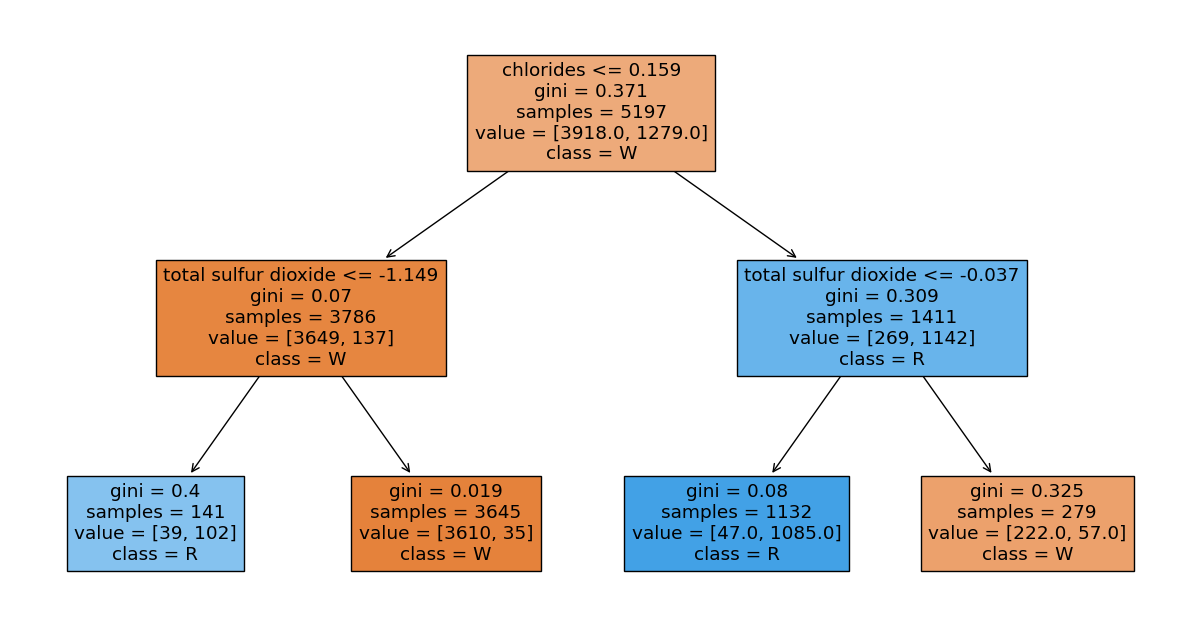

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(pipe['clf'], feature_names=X.columns, class_names=['W', 'R'], filled=True)